In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [3]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [4]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'Folktables_Income_GA_2018'
EXPERIMENT_SESSION_UUID = '42191a73-175c-465e-839c-635d9f83d9e5'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P&AGEP']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median']

In [5]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(224, 27)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,0,OK,2023-04-25 11:47:47.126,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.788629,0.733587,0.799510,0.750072,0.827731,0.714088,0.773717,0.758750,0.765907
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,1,OK,2023-04-25 11:47:47.160,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.787291,0.734539,0.800736,0.748916,0.827731,0.714088,0.771663,0.759880,0.765515
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,2,OK,2023-04-25 11:47:47.189,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.785953,0.732636,0.797057,0.748339,0.825630,0.711326,0.773717,0.754987,0.763943
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,3,OK,2023-04-25 11:47:47.217,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.785953,0.727402,0.795218,0.746027,0.825630,0.704420,0.770842,0.753481,0.761783
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,4,OK,2023-04-25 11:47:47.237,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.785619,0.725500,0.790926,0.746605,0.829832,0.701657,0.772074,0.750470,0.760801
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,5,OK,2023-04-25 11:47:47.258,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.785619,0.726451,0.792765,0.746316,0.823529,0.707182,0.773306,0.750094,0.761194
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,10,6,OK,2023-04-25 11:47:47.277,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.782943,0.722169,0.788473,0.743427,0.823529,0.694751,0.768378,0.748212,0.757855
14,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_Income_GA_2018,10,0,OK,2023-04-25 11:50:06.448,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.800334,0.747383,0.793991,0.771164,0.852941,0.719613,0.800821,0.757998,0.778476
15,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_Income_GA_2018,10,1,OK,2023-04-25 11:50:06.459,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.797993,0.747383,0.793991,0.769142,0.852941,0.720994,0.797947,0.757998,0.777101
16,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_Income_GA_2018,10,2,OK,2023-04-25 11:50:06.470,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.797659,0.744529,0.790926,0.768564,0.850840,0.716851,0.799589,0.753858,0.775727


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [11]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [12]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [13]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.3].head(200)

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,10.0,4.0,100.0,100.0,AGEP_dis,0.790468
1,Entropy,DecisionTreeClassifier,10.0,4.0,100.0,100.0,AGEP_dis,0.000000
2,F1,DecisionTreeClassifier,10.0,4.0,100.0,100.0,AGEP_dis,0.591864
3,FNR,DecisionTreeClassifier,10.0,4.0,100.0,100.0,AGEP_dis,0.515974
4,FPR,DecisionTreeClassifier,10.0,4.0,100.0,100.0,AGEP_dis,0.069235
...,...,...,...,...,...,...,...,...
139,Positive-Rate,DecisionTreeClassifier,10.0,4.0,100.0,100.0,overall,0.685962
140,Selection-Rate,DecisionTreeClassifier,10.0,4.0,100.0,100.0,overall,0.240868
141,Std,DecisionTreeClassifier,10.0,4.0,100.0,100.0,overall,0.126522
142,TNR,DecisionTreeClassifier,10.0,4.0,100.0,100.0,overall,0.905418


In [14]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,-0.304705
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,-0.114460
2,Disparate_Impact,DecisionTreeClassifier,SEX,0.540522
3,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,-0.396356
4,Accuracy_Parity,DecisionTreeClassifier,SEX,0.029030
5,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.146016
6,IQR_Parity,DecisionTreeClassifier,SEX,-0.016905
7,Std_Parity,DecisionTreeClassifier,SEX,-0.012012
8,Std_Ratio,DecisionTreeClassifier,SEX,0.910071
9,Jitter_Parity,DecisionTreeClassifier,SEX,-0.061396


### Subgroup metrics per dataset, experiment iteration, and model

In [29]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [16]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [17]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [18]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [19]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [20]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [21]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [22]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [23]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

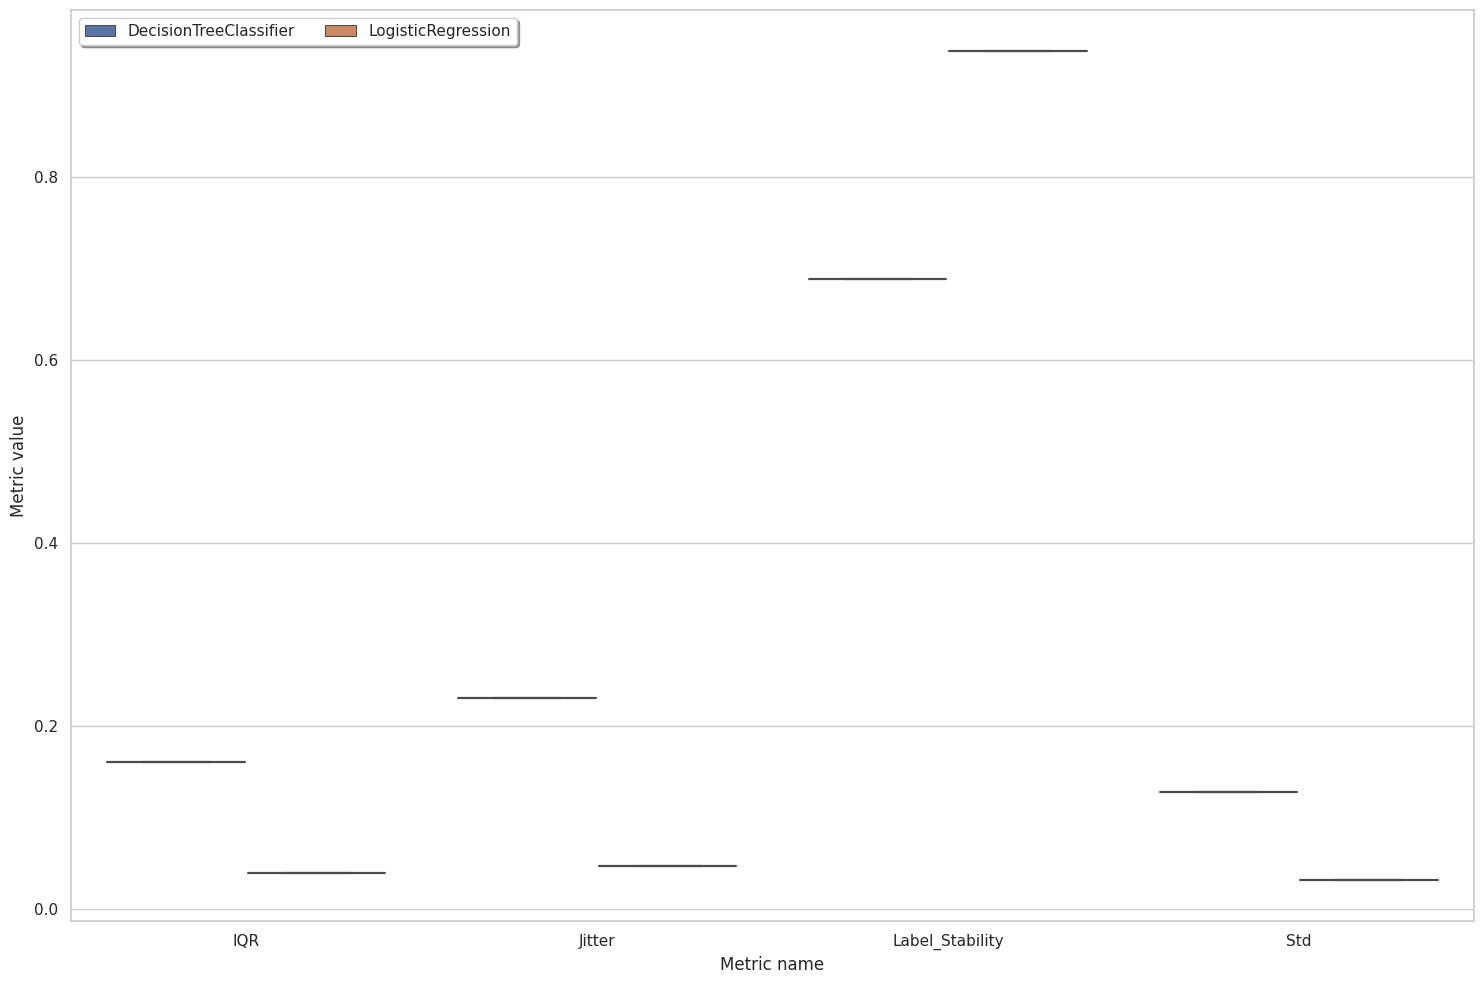

In [24]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

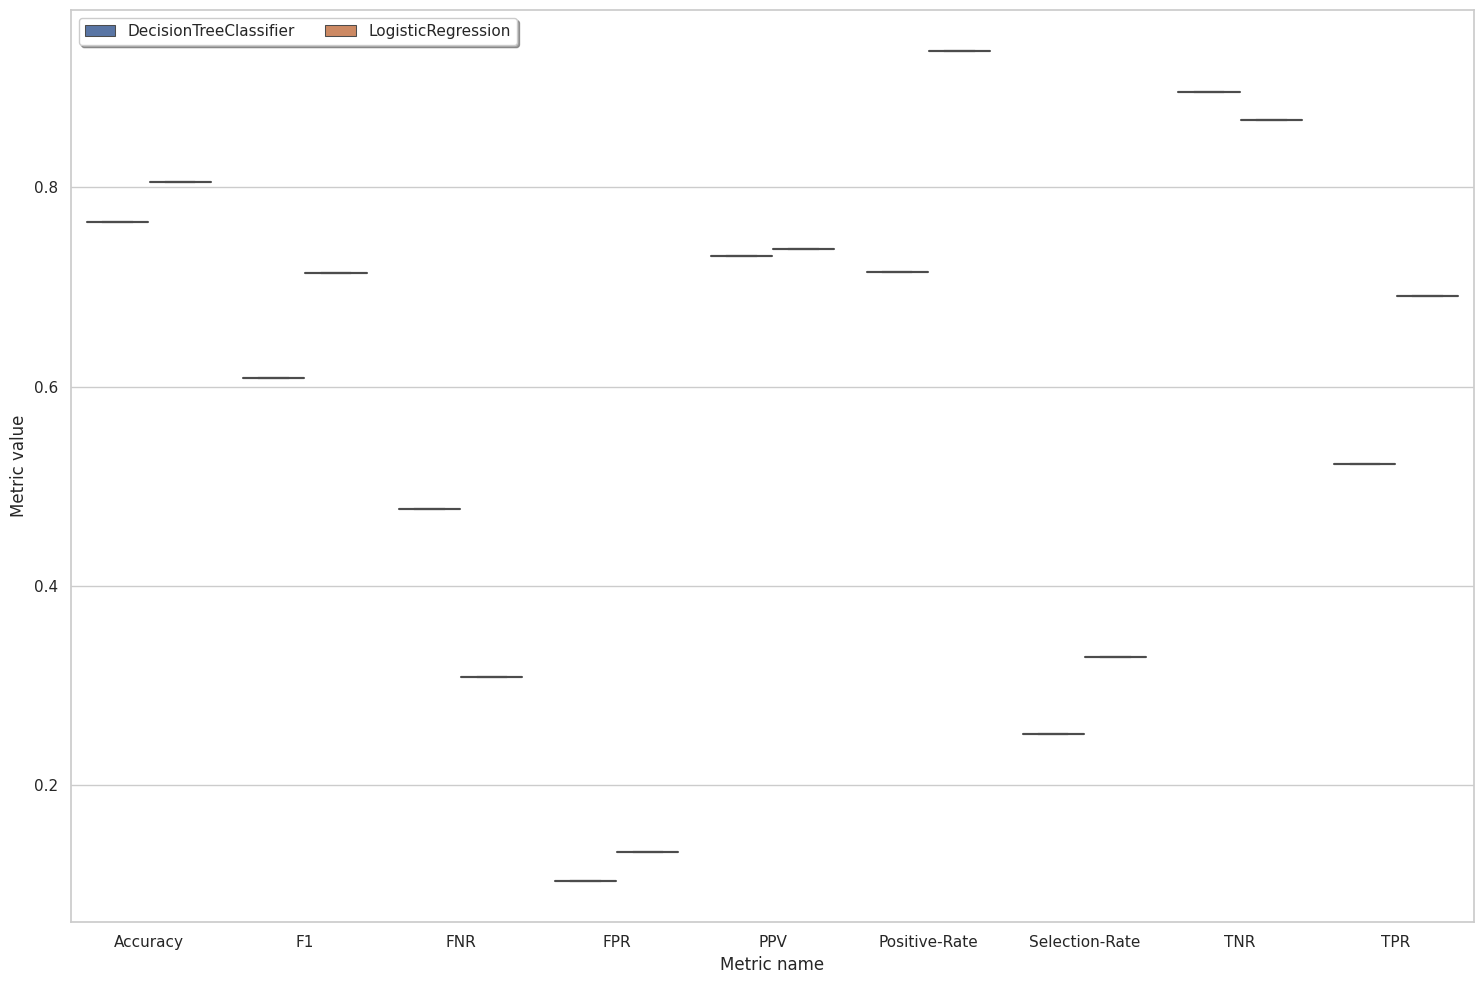

In [25]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

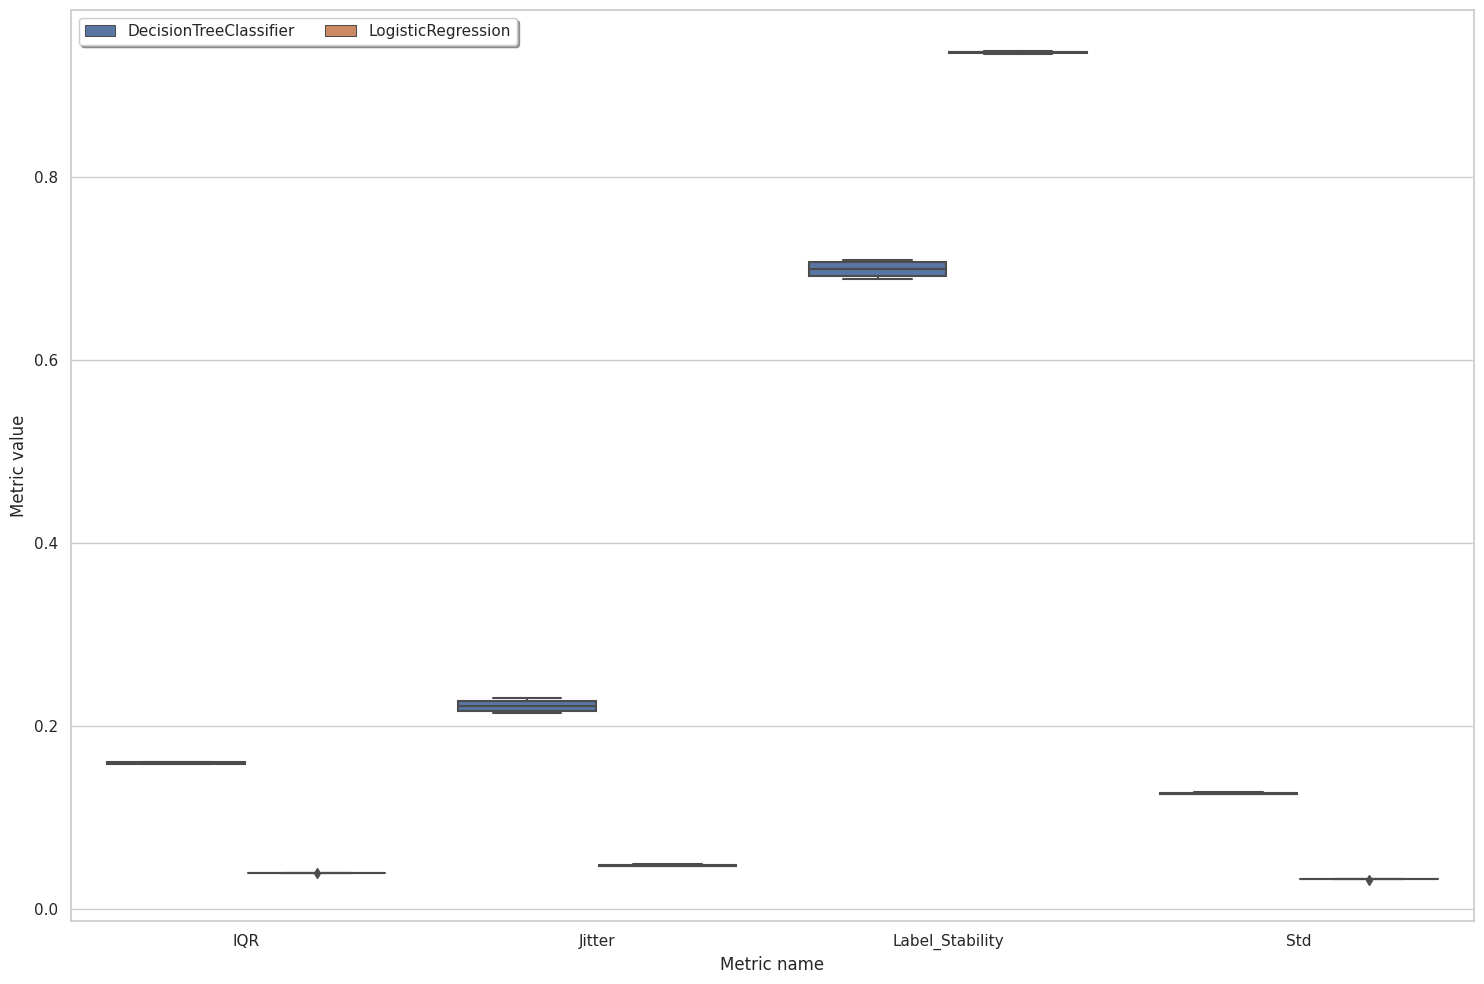

In [26]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

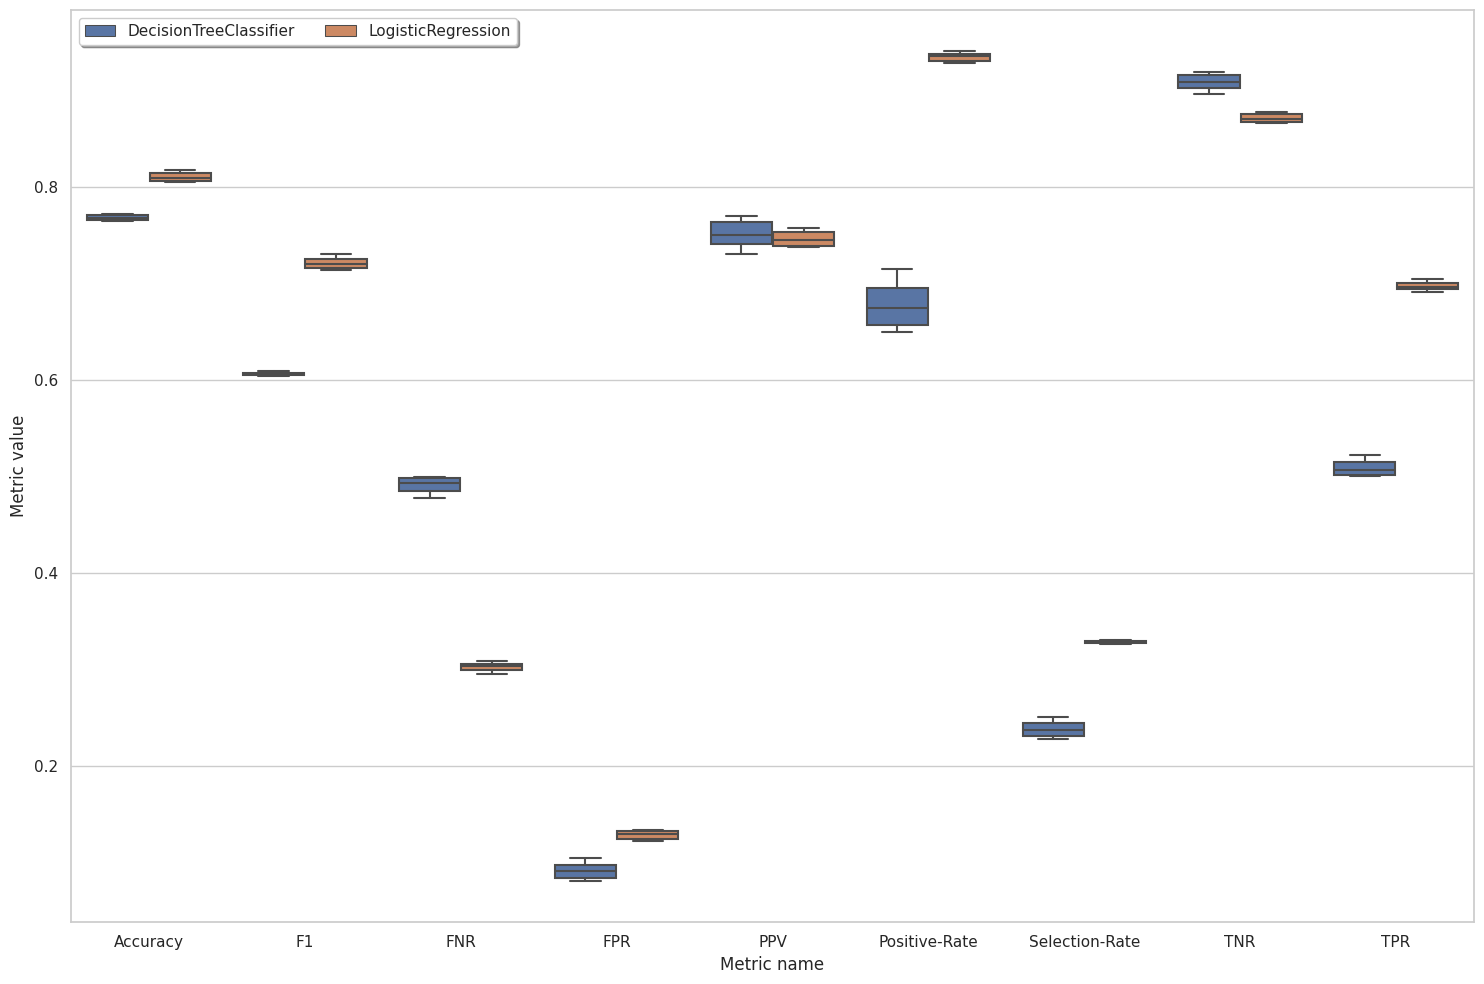

In [27]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')